# 1. Defining Problem

In [ ]:
# #set a working directory on the google drive
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Colab Notebooks/pestsens/

In [2]:
#pip install rasterio rasterstats earthpy scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.2 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Load the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import rasterstats as rs
import earthpy as et
import earthpy.plot as ep

# #Import machine learning libraries
# from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder



In [116]:

#Load the dataset
df= pd.read_csv('/home/drdc/Documents/repos/pestsens/2_processed/df.csv', delimiter=',')


In [4]:
# look at the data dimension

print(df.shape)

(800, 12)


In [117]:
#print the first 10 rows to llok at the data header
df.head(10)

,category,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
0,forest,0.1601,0.2375,0.1011,0.1641,0.3235,0.3295,0.2809,0.1820,0.1574,0.1754,0.1921
1,tea,0.1669,0.2689,0.1011,0.1912,0.4362,0.4444,0.3682,0.2084,0.1557,0.1918,0.1945
2,tea,0.1992,0.2977,0.1011,0.1783,0.3951,0.4032,0.3442,0.1986,0.1654,0.1853,0.1955
3,tea,0.1590,0.2605,0.1011,0.2002,0.4599,0.4679,0.3836,0.2054,0.1556,0.1934,0.1932
4,tea,0.1599,0.2598,0.1011,0.1958,0.4520,0.4589,0.3820,0.2033,0.1546,0.1904,0.1938
5,tea,0.1686,0.2620,0.1011,0.1922,0.4086,0.4176,0.3554,0.1984,0.1537,0.1878,0.1942
6,tea,0.1641,0.2637,0.1011,0.2019,0.4414,0.4527,0.3675,0.2025,0.1534,0.1887,0.1940
7,forest,0.1513,0.2355,0.1011,0.1839,0.3945,0.3881,0.3284,0.1826,0.1535,0.1769,0.1915
8,other,0.1898,0.2938,0.1011,0.1878,0.4230,0.4172,0.3642,0.2129,0.1610,0.1918,0.1959
9,water,0.1151,0.1319,0.1009,0.1438,0.1572,0.1876,0.1684,0.1652,0.1643,0.1920,0.2046


In [6]:
# let's look at the data types too
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   800 non-null    object 
 1   S2_srw_1   800 non-null    float64
 2   S2_srw_2   800 non-null    float64
 3   S2_srw_3   800 non-null    float64
 4   S2_srw_4   800 non-null    float64
 5   S2_srw_5   800 non-null    float64
 6   S2_srw_6   800 non-null    float64
 7   S2_srw_7   800 non-null    float64
 8   S2_srw_8   800 non-null    float64
 9   S2_srw_9   800 non-null    float64
 10  S2_srw_10  800 non-null    float64
 11  S2_srw_11  800 non-null    float64
dtypes: float64(11), object(1)
memory usage: 75.1+ KB


In [7]:
df.category.value_counts().sort_values()

forest    200
tea       200
other     200
water     200
Name: category, dtype: int64

# Data Quality issues

1.   Variables with incorrect data types
2.   Missing data in some columns
3.   records that were unidentified
4.   erroneous data in the columns year of installation or reporting.
5.   rename variables




In [132]:
#create a copy of the data
df_clean=df.copy()

In [133]:
df_clean.head()

,category,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
0,forest,0.1601,0.2375,0.1011,0.1641,0.3235,0.3295,0.2809,0.1820,0.1574,0.1754,0.1921
1,tea,0.1669,0.2689,0.1011,0.1912,0.4362,0.4444,0.3682,0.2084,0.1557,0.1918,0.1945
2,tea,0.1992,0.2977,0.1011,0.1783,0.3951,0.4032,0.3442,0.1986,0.1654,0.1853,0.1955
3,tea,0.1590,0.2605,0.1011,0.2002,0.4599,0.4679,0.3836,0.2054,0.1556,0.1934,0.1932
4,tea,0.1599,0.2598,0.1011,0.1958,0.4520,0.4589,0.3820,0.2033,0.1546,0.1904,0.1938


In [134]:
#give colums meaningfull name 
df_clean.rename(columns={"category":"class"},inplace=True)

df_clean.head()

,class,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11
0,forest,0.1601,0.2375,0.1011,0.1641,0.3235,0.3295,0.2809,0.1820,0.1574,0.1754,0.1921
1,tea,0.1669,0.2689,0.1011,0.1912,0.4362,0.4444,0.3682,0.2084,0.1557,0.1918,0.1945
2,tea,0.1992,0.2977,0.1011,0.1783,0.3951,0.4032,0.3442,0.1986,0.1654,0.1853,0.1955
3,tea,0.1590,0.2605,0.1011,0.2002,0.4599,0.4679,0.3836,0.2054,0.1556,0.1934,0.1932
4,tea,0.1599,0.2598,0.1011,0.1958,0.4520,0.4589,0.3820,0.2033,0.1546,0.1904,0.1938


It looks like we have negative values. which are absolutely erroneous data
we should check this


In [135]:
x=df_clean[["S2_srw_1","S2_srw_2","S2_srw_3",
                         "S2_srw_4","S2_srw_5","S2_srw_6","S2_srw_7","S2_srw_8","S2_srw_9",
                         "S2_srw_10","S2_srw_11"]]
y=df_clean['class']

In [136]:
#Create arrays for model development
#array=rw_clean.values
#x=array[:,0:6]
#y=array[:,7]

#create a validation set to evaluate the model
#Evaluate Algorithms: Baseline
# Test options and evaluation metric
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=val_size, random_state=seed)

In [38]:
y_val.value_counts()

tea       45
other     44
water     40
forest    31
Name: class, dtype: int64

In [137]:
# Spot-Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVC',SVC()))

# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))


LR = 0.87 ± 0.04
LDA = 0.9 ± 0.03
KNN = 0.9 ± 0.04
NB = 0.88 ± 0.03
CART = 0.87 ± 0.03
SVC = 0.89 ± 0.03


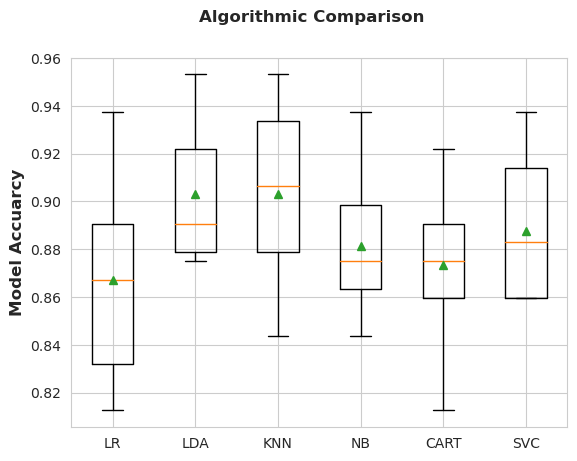

In [138]:
# Compare Algorithms
sns.set_style("whitegrid")
fig=plt.figure()
fig.suptitle('Algorithmic Comparison', size=12, weight="bold")
ax = fig.add_subplot(111)
plt.boxplot(results,labels=names, showmeans=True)
ax.set_xticklabels(names)
plt.ylabel("Model Accuarcy",size=12, weight="bold")
plt.show()

In [139]:
# ensembles
scoring='accuracy'
ensembles=[]
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))

results_ens=[]
names_ens=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results_ens.append(cv_results)
    names_ens.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))

AB = 0.77 ± 0.1
GBM = 0.92 ± 0.03
RF = 0.91 ± 0.02
ET = 0.92 ± 0.02


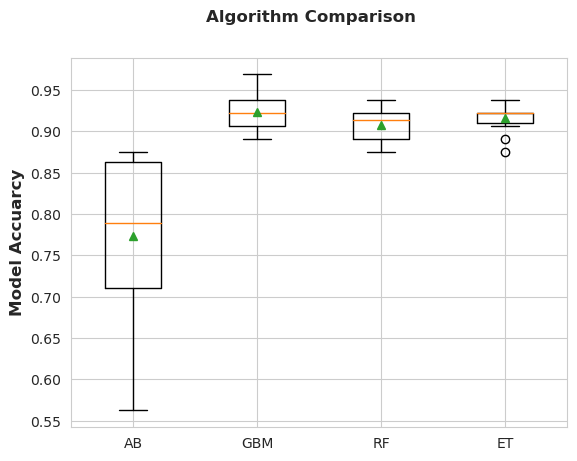

In [140]:
# d) Compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison',size=12, weight="bold")
ax = fig.add_subplot(111)
plt.boxplot(results_ens,labels=names_ens, showmeans=True)
ax.set_xticklabels(names_ens)
plt.ylabel("Model Accuarcy",size=12, weight="bold")
plt.show()

In [27]:
#Tune the best model AGB

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=None)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

Best: 0.920000 using {'n_estimators': 350}


In [28]:
#Tune the best model RF

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestClassifier(random_state=None)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

Best: 0.920000 using {'n_estimators': 250}


In [141]:
#Finalize the model
final_GBM=GradientBoostingClassifier(random_state=seed, n_estimators=100)
final_GBM=final_GBM.fit(x_train, y_train)


In [142]:
# Make predictions on validation dataset

predictions= final_GBM.predict(x_val)
print(accuracy_score(y_val, predictions))

0.91875


In [126]:
#print the confusion matrix
print(confusion_matrix(y_val, predictions))

[[31  0  0  0]
 [ 1 39  4  0]
 [ 2  5 38  0]
 [ 0  1  0 39]]


In [127]:
#now let's print the classification report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

      forest       0.91      1.00      0.95        31
       other       0.87      0.89      0.88        44
         tea       0.90      0.84      0.87        45
       water       1.00      0.97      0.99        40

    accuracy                           0.92       160
   macro avg       0.92      0.93      0.92       160
weighted avg       0.92      0.92      0.92       160



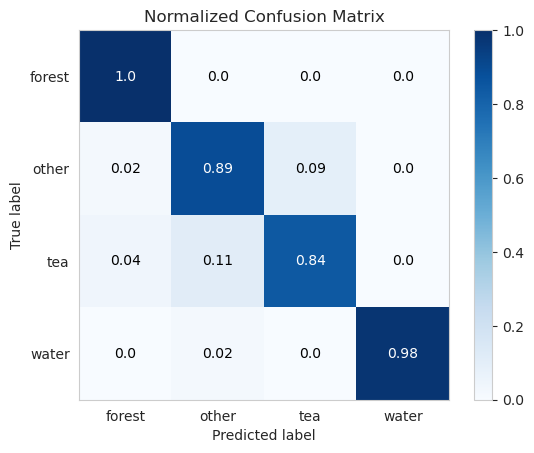

In [128]:
#we can now use the scikitplot to visualize the report
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()

Feature: 0, Score: 0.04281
Feature: 1, Score: 0.02466
Feature: 2, Score: 0.00214
Feature: 3, Score: 0.04313
Feature: 4, Score: 0.27889
Feature: 5, Score: 0.01875
Feature: 6, Score: 0.13358
Feature: 7, Score: 0.01991
Feature: 8, Score: 0.20897
Feature: 9, Score: 0.21052
Feature: 10, Score: 0.01665


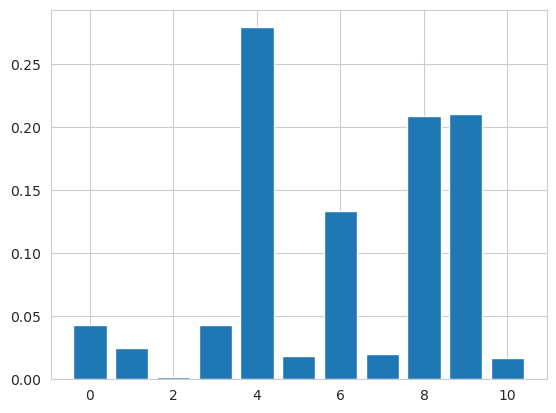

In [34]:
#plot variables importance
# get importance from GBM
importance = final_GBM.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [35]:
variables=list(x.columns)
variables

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11']

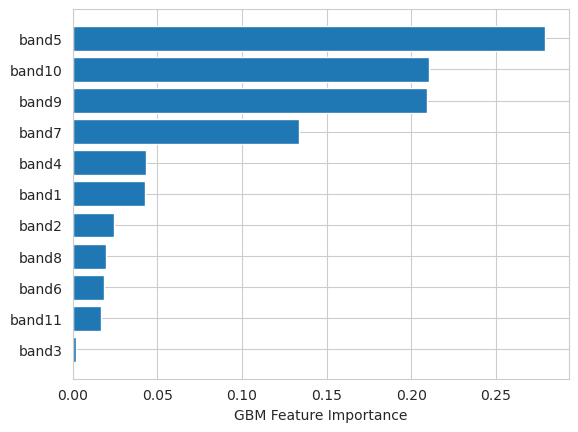

In [36]:
feature=x_train.columns
sorted_idx = final_GBM.feature_importances_.argsort()
plt.barh(feature[sorted_idx], final_GBM.feature_importances_[sorted_idx])
plt.xlabel("GBM Feature Importance");

In [46]:
df_shp=gpd.read_file('/home/drdc/Documents/repos/pestsens/1_orginal/rwanda_points.shp')
df_im=rxr.open_rasterio('/home/drdc/Documents/repos/pestsens/1_orginal/S2_srw.tif', masked=True).squeeze()

In [61]:
df_im

<xarray.DataArray (band: 11, y: 881, x: 654)>
[6337914 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11
  * x            (x) float64 29.03 29.03 29.03 29.03 ... 29.09 29.09 29.09 29.09
  * y            (y) float64 -2.397 -2.397 -2.397 ... -2.476 -2.476 -2.476
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('B12', 'B11', 'B10', 'B9', 'B8', 'B7', 'B6', 'B5', 'B4',...

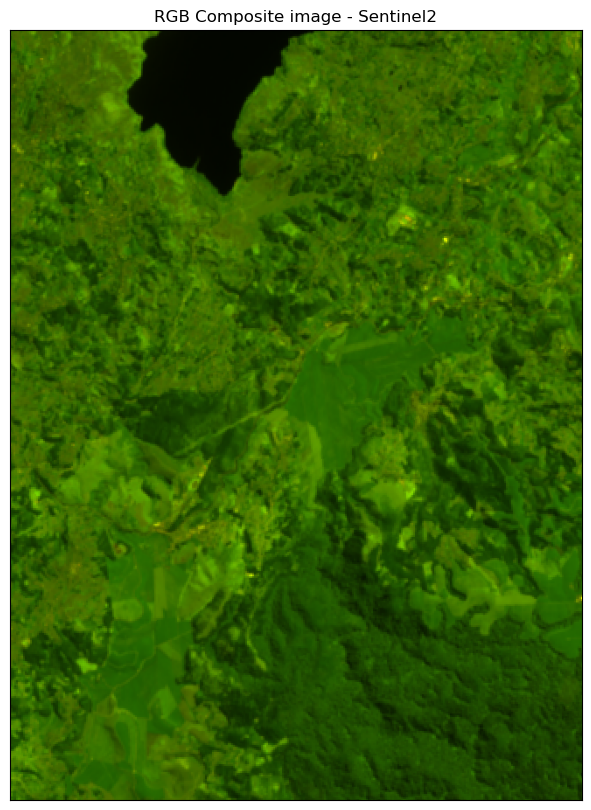

In [31]:
ep.plot_rgb(df_im.values,
            rgb=[0,1,2],
            title="RGB Composite image - Sentinel2")
plt.show()


In [104]:
import rasterio
import pandas as pd

def sentinel_to_dataframe(image_path):
    # Open the Sentinel 2 image using rasterio
    with rasterio.open(image_path) as src:
        # Read all bands of the image
        bands = src.read()

        # Get the metadata of the image
        meta = src.meta

    # Reshape the bands array to a 2D array
    bands = bands.reshape(bands.shape[0], -1).T

    # Create the DataFrame using pandas
    df = pd.DataFrame(bands)

    # Set the column names using band names
    band_names = [f"Band {i+1}" for i in range(bands.shape[1])]
    df.columns = band_names

    return df


def raster_to_dataframe(raster_file):
    # Open the raster file using rasterio
    with rasterio.open(raster_file) as src:
        # Read the raster bands into a numpy array
        raster_array = src.read()

        # Reshape the array to a 2D matrix
        reshaped_array = raster_array.reshape(src.count, -1).T

        # Get the raster band names
        band_names = [f"B{idx + 1}" for idx in range(src.count)]

        # Create a DataFrame with the reshaped array and band names
        df = pd.DataFrame(reshaped_array, columns=band_names)

        # Add spatial information to the DataFrame
        df["x"] = src.xy(0, 0)[0] + src.res[0] * df.index % src.width
        df["y"] = src.xy(0, 0)[1] - src.res[1] * df.index // src.width

    return df



def dataframe_to_geotiff(dataframe, output_file, template_file):
    # Open the template GeoTIFF file using rasterio to get metadata
    with rasterio.open(template_file) as template_src:
        # Create a new GeoTIFF file with the same metadata as the template
        with rasterio.open(
            output_file,
            "w",
            driver="GTiff",
            height=template_src.height,
            width=template_src.width,
            count=len(dataframe.columns),
            dtype=dataframe.dtypes[0].name,
            crs=template_src.crs,
            transform=template_src.transform,
        ) as dst:
            # Write each band of the DataFrame to the GeoTIFF file
            for idx, column in enumerate(dataframe.columns):
                dst.write(dataframe[column].values.reshape(dst.height, dst.width), idx + 1)


In [154]:

# Example usage
raster_file = "/home/drdc/Documents/repos/pestsens/2_processed/df_all.csv"


df_ras=pd.read_csv("/home/drdc/Documents/repos/pestsens/2_processed/df_all.csv")
df_ras.head()


,fid,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11,x,y
0,1,0.1743,0.2543,0.1011,0.1786,0.3251,0.3460,0.3085,0.2010,0.1622,0.1809,0.1985,29.026678,-2.39702
1,2,0.1743,0.2543,0.1011,0.1786,0.3330,0.3460,0.3085,0.2010,0.1702,0.1890,0.1999,29.026768,-2.39702
2,3,0.1928,0.2613,0.1011,0.1786,0.3044,0.3286,0.2948,0.2109,0.1871,0.1909,0.2010,29.026858,-2.39702
3,4,0.1928,0.2613,0.1011,0.1786,0.2935,0.3286,0.2948,0.2109,0.1953,0.1919,0.2036,29.026947,-2.39702
4,5,0.1783,0.2541,0.1012,0.1723,0.3059,0.3176,0.2865,0.1966,0.1825,0.1913,0.2021,29.027037,-2.39702


In [115]:
len(df_ras.y)

576174

In [155]:
df_ras.drop(columns="fid", inplace=True)

In [156]:
df_ras.head()

,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11,x,y
0,0.1743,0.2543,0.1011,0.1786,0.3251,0.3460,0.3085,0.2010,0.1622,0.1809,0.1985,29.026678,-2.39702
1,0.1743,0.2543,0.1011,0.1786,0.3330,0.3460,0.3085,0.2010,0.1702,0.1890,0.1999,29.026768,-2.39702
2,0.1928,0.2613,0.1011,0.1786,0.3044,0.3286,0.2948,0.2109,0.1871,0.1909,0.2010,29.026858,-2.39702
3,0.1928,0.2613,0.1011,0.1786,0.2935,0.3286,0.2948,0.2109,0.1953,0.1919,0.2036,29.026947,-2.39702
4,0.1783,0.2541,0.1012,0.1723,0.3059,0.3176,0.2865,0.1966,0.1825,0.1913,0.2021,29.027037,-2.39702


In [157]:
df_ras["class"]= final_GBM.predict(df_ras.iloc[:,0:11])
df_ras.head()

,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11,x,y,class
0,0.1743,0.2543,0.1011,0.1786,0.3251,0.3460,0.3085,0.2010,0.1622,0.1809,0.1985,29.026678,-2.39702,forest
1,0.1743,0.2543,0.1011,0.1786,0.3330,0.3460,0.3085,0.2010,0.1702,0.1890,0.1999,29.026768,-2.39702,other
2,0.1928,0.2613,0.1011,0.1786,0.3044,0.3286,0.2948,0.2109,0.1871,0.1909,0.2010,29.026858,-2.39702,other
3,0.1928,0.2613,0.1011,0.1786,0.2935,0.3286,0.2948,0.2109,0.1953,0.1919,0.2036,29.026947,-2.39702,other
4,0.1783,0.2541,0.1012,0.1723,0.3059,0.3176,0.2865,0.1966,0.1825,0.1913,0.2021,29.027037,-2.39702,other


In [158]:
df_ras["class"].replace({"forest":1, "water":2, "tea":3, "other":4}, inplace=True)

df_ras.head()

,S2_srw_1,S2_srw_2,S2_srw_3,S2_srw_4,S2_srw_5,S2_srw_6,S2_srw_7,S2_srw_8,S2_srw_9,S2_srw_10,S2_srw_11,x,y,class
0,0.1743,0.2543,0.1011,0.1786,0.3251,0.3460,0.3085,0.2010,0.1622,0.1809,0.1985,29.026678,-2.39702,1
1,0.1743,0.2543,0.1011,0.1786,0.3330,0.3460,0.3085,0.2010,0.1702,0.1890,0.1999,29.026768,-2.39702,4
2,0.1928,0.2613,0.1011,0.1786,0.3044,0.3286,0.2948,0.2109,0.1871,0.1909,0.2010,29.026858,-2.39702,4
3,0.1928,0.2613,0.1011,0.1786,0.2935,0.3286,0.2948,0.2109,0.1953,0.1919,0.2036,29.026947,-2.39702,4
4,0.1783,0.2541,0.1012,0.1723,0.3059,0.3176,0.2865,0.1966,0.1825,0.1913,0.2021,29.027037,-2.39702,4


In [172]:
import pandas as pd
import rasterio
from rasterio.transform import from_origin

In [168]:


def rasterize_csv_to_geotiff(csv_path, output_geotiff_path, x_col, y_col, value_col, pixel_size, nodata_value):
    # Read the CSV file using pandas
    df = pd.read_csv(csv_path)

    # Extract x, y, and value columns from the DataFrame
    x = df[x_col]
    y = df[y_col]
    values = df[value_col]

    # Determine the dimensions of the raster
    min_x, max_x = min(x), max(x)
    min_y, max_y = min(y), max(y)
    width = int((max_x - min_x) / pixel_size)
    height = int((max_y - min_y) / pixel_size)

    # Create the raster data array
    data = values.values.reshape(height, width)

    # Define the transformation parameters
    transform = from_origin(min_x, max_y, pixel_size, pixel_size)

    # Create the GeoTIFF file using rasterio
    with rasterio.open(
        output_geotiff_path,
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,
        dtype=data.dtype,
        crs='EPSG:4326',
        transform=transform,
        nodata=nodata_value
    ) as dst:
        dst.write(data, 1)




In [ ]:
# Example usage
rasterize_csv_to_geotiff(df_ras, 'output.tif', 'x', 'y', 'class', 10, 0)




In [159]:
# Perform some operations on the DataFrame if needed
# ...

output_file = "/home/drdc/Documents/repos/pestsens/2_processed/class_image.tif"
template_file = "/home/drdc/Documents/repos/pestsens/1_orginal/S2_srw.tif"
dataframe_to_geotiff(df_ras, output_file, template_file)

In [160]:
df_ras.to_csv("df_class.csv", index=False)